In [1]:
import scipy.io
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

### What problem do HMMS solve?

$$P(x_t|y_{1:t}) = P(x_t|y_1,y_2,...,y_t)$$

##### example 1.

##### example 2.

##### example 3

##### example 4

$$P(x_t|y_{1:t}) = P(x_t|y_1,y_2,...,y_t)$$

$$P(x_{t-1}|y_{1:t-1})$$

the recursion has two steps:
1. prediction
2. bayesian update

$$P(x_0)$$
$$y_1 \rightarrow  P(x_1|y_{1})$$
$$y_2 \rightarrow  P(x_2|y_{1:2})$$
$$y_3 \rightarrow  P(x_3|y_{1:3})$$
$$\vdots $$
$$y_t \rightarrow  P(x_t|y_{1:t})$$

#### prediction 

$$P(x_t|y_{1:t-1}) =\sum_{x_{t-1}\epsilon \left \{  H,S \right \}}P(x_t,x_{t-1}|y_{1:t-1})$$

$$P(x_t|y_{1:t-1}) =\sum_{x_{t-1}\epsilon \left \{  H,S \right \}}P(x_t|x_{t-1},y_{1:t-1})P(x_{t-1}|y_{1:t-1})$$

$$P(x_t|x_{t-1},y_{1:t-1}) \rightarrow P(x_t|x_{t-1})$$

$$P(x_t|y_{1:t-1}) =\sum_{x_{t-1}\epsilon \left \{  H,S \right \}}P(x_t|x_{t-1})P(x_{t-1}|y_{1:t-1})$$

### bayes update

$$P(x_t|y_{1:t}) = P(x_t|y_t,y_{1:t-1})\overset{bayes}{\rightarrow}P(x_t|y_t,y_{1:t-1})= \frac{P(y_t|x_t,y_{1:t-1})P(x_t|y_{1:t-1})}
{\sum_{x_t}P(y_t|x_t,y_{1:t-1})P(x_t|y_{1:t-1})}$$

$$P(x_t|y_{1:t}) = P(x_t|y_t,y_{1:t-1})\overset{bayes}{\rightarrow}P(x_t|y_t,y_{1:t-1})= \frac{P(y_t|x_t,y_{1:t-1})P(x_t|y_{1:t-1})}
{\sum_{x_t}P(y_t|x_t,y_{1:t-1})P(x_t|y_{1:t-1})} = \frac{P(y_t|x_t)P(x_t|y_{1:t-1})}
{\sum_{x_t}P(y_t|x_t)P(x_t|y_{1:t-1})}$$

### Problem Sets

In [4]:
mat = scipy.io.loadmat('./TΕL606_labnotes_3.mat')

In [5]:
data = mat['price_move']

In [6]:
l =  data.shape[0]
price_move = np.zeros(l)
for i, p in enumerate(data):
    price_move[i] = p[0]

In [7]:
ys = price_move

In [8]:
ys

array([-1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,
       -1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.])

In [95]:
df = pd.DataFrame(price_move,columns=['price_move'])

In [10]:
q = 0.9
px = np.array([0.8,0.2])
pxx = np.array([[.8,.2],
                [.2,.8]])
pyx = np.array([[1-q, q],
                [q,1-q]])

In [11]:
px

array([ 0.8,  0.2])

In [12]:
pxx

array([[ 0.8,  0.2],
       [ 0.2,  0.8]])

In [13]:
pyx

array([[ 0.1,  0.9],
       [ 0.9,  0.1]])

In [14]:
ytra = []
for i in ys:
    if i==-1:
        ytra.append(0)
    else:
        ytra.append(1)

In [140]:
Q=0
const = px[Q]#*pxx[Q,Q]
a10 = [const]
for i in range(1,39):
    O = ytra[:i]
    product = np.zeros(len(O)+1)
    product[0]=const
    for i, o in enumerate(O,start=1):
#         print(o)
        product[i] = pyx[o,Q]
    a10.append(product.prod())

In [141]:
Q=1
const = px[Q]#*pxx[Q,Q]
a11 = [const]
for i in range(1,39):
    O = ytra[:i]
    product = np.zeros(len(O)+1)
    product[0]=const
    for i, o in enumerate(O,start=1):
#         print(o)
        product[i] = pyx[o,Q]
    a11.append(product.prod())

In [145]:
ai = np.array(list(zip(a10,a11)))

### Forward-Backward Algorythm

In [79]:
hidden_states=[0,1]

### Forward

$$a_1(x_1)=P(x_1,y_1)=P(y_1|x_1)P(x_1)$$
$$a_1(x_1=GOOD)=P(x_1=GOOD,y_1=-1)=P(y_1=-1|x_1=GOOD)P(x_1=GOOD)$$
$$a_1(x_1=BAD)=P(x_1=BAD,y_1=-1)=P(y_1=-1|x_1=BAD)P(x_1=BAD)$$

In [70]:
a1g = (1-q) * 0.8
a1b = q * .2
ai_ar = np.zeros((39, 2))
ai_ar[0, :] = [a1b, a1g]

$$a_i(x_i)$$

In [80]:
for t in range(1, 39):
    for xi in hidden_states:
        ai_ar[t, xi] = (ai_ar[t-1, 0]* pxx[0, xi] * pyx[0, ytra[t]]) + (ai_ar[t-1, 1] * pxx[1, xi] * pyx[1, ytra[t]])

$$b_i(x_i)$$

In [81]:
b1g = 1
b1b = 1
bi_ar = np.zeros((39, 2))
bi_ar[-1,:] = [b1b, b1g]

In [82]:
for t in np.arange(37,-1,-1):
    for xi in hidden_states:        
        bi_ar[t,xi] = (bi_ar[t+1, 0] * pxx[xi, 0] * pyx[0, ytra[t+1]]) + (bi_ar[t+1, 1] * pxx[xi, 1] * pyx[1, ytra[t+1]])

$$gamma_i(x_i)$$

In [83]:
l = []
for t in range(39):
    ab = (ai_ar[t]*bi_ar[t])
    s = ab.sum()
    d = ab/s    
    l.append(d)

In [84]:
out = np.zeros((39,2))
for i, a in enumerate(l):
    out[i,:] = a

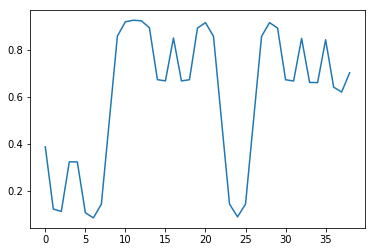

In [85]:
plt.plot(range(39),out[:,0])

# Plot stock movements

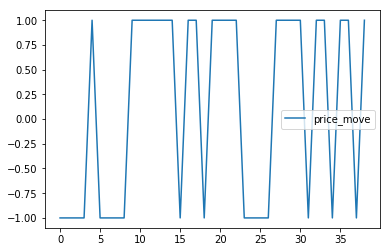

In [96]:
df.plot()

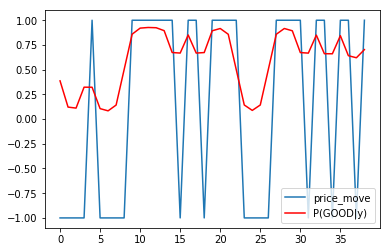

In [98]:
df.plot()
plt.plot(range(39),out[:,0],color='r',label=r'P(GOOD|y)')
plt.legend(loc=4)

### Actual

In [ ]:
df.cumsum().plot()

# ORIGINAL

In [27]:
import numpy as np
import time

start = ['Rain','Sun']
# state probabilities
p_start = [0.2,0.8]

#Transition probabilities
# These are calculated beforehand
t1 = ['Rain','Sun']
p_t1=[[0.4,0.6],
      [0.3,0.7]]

#t2 = [['W|R','Sh|R','C|R'],['W|Su','Sh|Su','C|Su']]
t2 = ['Walk','Shop','Clean']
#Emission probability
p_t2=[[0.1,0.4,0.5],
      [0.6,0.3,0.1]]

initial = np.random.choice(start, 
                           replace=True, 
                           p=p_start)

n = 4

st = 1
for i in range(n):
    if st:
        print('Setting the Initial State')
        state = initial
        st = 0
        print('Initial State:', state)
    if state == 'Rain':
        activity = np.random.choice(t2, p=p_t2[0])
        print('The state was?:', state)
        print('Do this today?: ', activity)
        state = np.random.choice(t1, p=p_t1[0])
    elif state == 'Sun':
        activity = np.random.choice(t2, p=p_t2[1])
        print('The state was?:',state)
        print('Do this today?: ', activity)     
        state = np.random.choice(t1, p=p_t1[1])
    print("\n")
#     time.sleep(0.5)
    
    # Output (I printed out the hidden state too)
    # R R Shop -- R Clean -- Su Walk -- Su Walk -- Su Walk -- Su Clean -- Su Walk -- R Shop -- R Shop -- R Shop -- R Shop -- Su Shop -- R Clean -- Su Walk -- Su Walk -- R Shop -- R Clean -- R Clean -- Su Shop -- Su Shop
    

Setting the Initial State
Initial State: Sun
The state was?: Sun
Do this today?:  Shop


The state was?: Rain
Do this today?:  Clean


The state was?: Rain
Do this today?:  Clean


The state was?: Sun
Do this today?:  Walk




In [26]:
import numpy as np
import time

start = ['BAD','GOOD']
# state probabilities
p_start = [0.8, 0.2]

#Transition probabilities
# These are calculated beforehand
t1 = ['BAD','GOOD']

p_t1=[[0.8,0.2],
      [0.2,0.8]]

#t2 = [['W|R','Sh|R','C|R'],['W|Su','Sh|Su','C|Su']]
t2 = [1,-1]
#Emission probability
p_t2=[[0.3,0.7],
      [0.7,0.3]]

initial = np.random.choice(start, 
                           replace=True, 
                           p=p_start)

n = 39

st = 1
activities  = []
for i in range(n):
    if st:
        print('Setting the Initial State')
        state = initial
        st = 0
        print('Initial State:', state)
    if state == 'BAD':
        activity = np.random.choice(t2, p=p_t2[0])
        print('The state was?:',state)
        print('Do this today?: ', activity)
        activities.append(activity)
        state = np.random.choice(t1, p=p_t1[0])
    elif state == 'GOOD':
        activity = np.random.choice(t2, p=p_t2[1])
        print('The state was?:',state)
        print('Do this today?: ', activity)  
        activities.append(activity)
        state = np.random.choice(t1, p=p_t1[1])
    print("\n")

Setting the Initial State
Initial State: GOOD
The state was?: GOOD
Do this today?:  1


The state was?: GOOD
Do this today?:  -1


The state was?: GOOD
Do this today?:  1


The state was?: GOOD
Do this today?:  1


The state was?: BAD
Do this today?:  1


The state was?: BAD
Do this today?:  -1


The state was?: GOOD
Do this today?:  -1


The state was?: GOOD
Do this today?:  -1


The state was?: GOOD
Do this today?:  1


The state was?: GOOD
Do this today?:  1


The state was?: GOOD
Do this today?:  -1


The state was?: GOOD
Do this today?:  1


The state was?: GOOD
Do this today?:  1


The state was?: BAD
Do this today?:  -1


The state was?: BAD
Do this today?:  1


The state was?: GOOD
Do this today?:  1


The state was?: GOOD
Do this today?:  1


The state was?: BAD
Do this today?:  1


The state was?: BAD
Do this today?:  -1


The state was?: BAD
Do this today?:  -1


The state was?: GOOD
Do this today?:  1


The state was?: GOOD
Do this today?:  -1


The state was?: GOOD
Do this

In [ ]:
df[0].values

In [ ]:
orig = df[0].values
orig

In [ ]:
plt.plot(orig, color='b')
plt.plot(activities, color='r')
# df.plot()
plt.yticks([-1,+1])

In [ ]:
len(activities)

In [ ]:
len(orig)